# Titanic Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Load Data

In [3]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Check Data Types

In [4]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [5]:
df.value_counts()

survived  pclass  sex     age   sibsp  parch  fare      embarked  class  who    adult_male  deck  embark_town  alive  alone
1         1       female  24.0  0      0      69.3000   C         First  woman  False       B     Cherbourg    yes    True     2
                          58.0  0      0      26.5500   S         First  woman  False       C     Southampton  yes    True     1
                          49.0  0      0      25.9292   S         First  woman  False       D     Southampton  yes    True     1
                                1      0      76.7292   C         First  woman  False       D     Cherbourg    yes    False    1
                          50.0  0      1      247.5208  C         First  woman  False       B     Cherbourg    yes    False    1
                                                                                                                              ..
                          16.0  0      0      86.5000   S         First  woman  False       B     Sout

In [6]:
{ col: df[col].unique() for col in df }

{'survived': array([0, 1], dtype=int64),
 'pclass': array([3, 1, 2], dtype=int64),
 'sex': array(['male', 'female'], dtype=object),
 'age': array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
         4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
         8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
        49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
        16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
        71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
        51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
        45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
        60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
        70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ]),
 'sibsp': array([1, 0, 3, 4, 2, 5, 8], dtype=int64),
 'parch': array([0, 1, 2, 5, 3, 4, 6], dtype=int64),
 'fare': array([  7.25  ,  71.2833,   7.925 ,  53.

In [7]:
{ col: df[col].nunique() for col in df }

{'survived': 2,
 'pclass': 3,
 'sex': 2,
 'age': 88,
 'sibsp': 7,
 'parch': 7,
 'fare': 248,
 'embarked': 3,
 'class': 3,
 'who': 3,
 'adult_male': 2,
 'deck': 7,
 'embark_town': 3,
 'alive': 2,
 'alone': 2}

In [8]:
{ col: df[col].nunique() for col in df if df[col].dtype == object }

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [12]:
df = df.astype({
    'alive': 'category',
    'sex': 'category',
    'embarked': 'category',
    'who': 'category',
    'embark_town': 'category',
})
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
df.alive

0       no
1      yes
2      yes
3      yes
4       no
      ... 
886     no
887    yes
888     no
889    yes
890     no
Name: alive, Length: 891, dtype: category
Categories (2, object): ['no', 'yes']

In [14]:
df.alive.cat.codes

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Length: 891, dtype: int8

In [15]:
# df.alive.cat is like when df.name.str or dg.age.int

In [16]:
# df.alive.cat.codes means numerize the items from zero

In [17]:
df.alive = df.alive.cat.codes
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,0,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,0,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


In [18]:
df[['alive', 'survived']]

,alive,survived
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [19]:
isinstance(True, int)

True

In [20]:
issubclass(bool, int)

True

In [21]:
df.sex = df.sex.cat.codes
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,0,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,0,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


In [24]:
# checking correlations
# df.corr

In [27]:
pd.get_dummies(df) # representing with  0  and  1

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,True,0,False,...,False,False,False,False,False,False,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,1,False,...,False,False,True,False,False,False,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,1,True,...,False,False,False,False,False,False,False,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,1,False,...,False,False,True,False,False,False,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,True,0,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,True,0,True,...,False,False,False,False,False,False,False,False,False,True
887,1,1,0,19.0,0,0,30.0000,False,1,True,...,False,True,False,False,False,False,False,False,False,True
888,0,3,0,NaN,1,2,23.4500,False,0,False,...,False,False,False,False,False,False,False,False,False,True
889,1,1,1,26.0,0,0,30.0000,True,1,True,...,False,False,True,False,False,False,False,True,False,False


In [28]:
df.corr()

ValueError: could not convert string to float: 'S'

In [30]:
df[['sex', 'age', 'pclass', 'alive']].corr()

,sex,age,pclass,alive
sex,1.000000,0.093254,0.131900,-0.543351
age,0.093254,1.000000,-0.369226,-0.077221
pclass,0.131900,-0.369226,1.000000,-0.338481
alive,-0.543351,-0.077221,-0.338481,1.000000


In [31]:
# .corr() # Pearson Correlation Coeficient

In [34]:
df[['sex', 'age', 'pclass', 'alive']].corr().style.background_gradient(cmap='Greens')

,sex,age,pclass,alive
sex,1.000000,0.093254,0.131900,-0.543351
age,0.093254,1.000000,-0.369226,-0.077221
pclass,0.131900,-0.369226,1.000000,-0.338481
alive,-0.543351,-0.077221,-0.338481,1.000000


In [35]:
df[['sex', 'age', 'pclass', 'alive']].corr()[['alive']].style.background_gradient(cmap='Greens')

,alive
sex,-0.543351
age,-0.077221
pclass,-0.338481
alive,1.000000


In [36]:
abs(df[['sex', 'age', 'pclass', 'alive']].corr())[['alive']].style.background_gradient(cmap='Greens')

,alive
sex,0.543351
age,0.077221
pclass,0.338481
alive,1.000000


In [37]:
abs(df[['sex', 'age', 'pclass', 'alive']].corr()).style.background_gradient(cmap='Greens')

,sex,age,pclass,alive
sex,1.000000,0.093254,0.131900,0.543351
age,0.093254,1.000000,0.369226,0.077221
pclass,0.131900,0.369226,1.000000,0.338481
alive,0.543351,0.077221,0.338481,1.000000


In [39]:
df[['sex', 'age', 'pclass', 'alive']].corrwith(df['alive'])

sex      -0.543351
age      -0.077221
pclass   -0.338481
alive     1.000000
dtype: float64

In [40]:
df[['sex', 'age', 'pclass', 'alive']].corrwith(pd.Series(df['alive']))

sex      -0.543351
age      -0.077221
pclass   -0.338481
alive     1.000000
dtype: float64

In [41]:
df[['sex', 'age', 'pclass', 'alive']].corr().style.highlight_min()

,sex,age,pclass,alive
sex,1.000000,0.093254,0.131900,-0.543351
age,0.093254,1.000000,-0.369226,-0.077221
pclass,0.131900,-0.369226,1.000000,-0.338481
alive,-0.543351,-0.077221,-0.338481,1.000000


In [43]:
df[['sex', 'age', 'pclass', 'alive']].corr().style.highlight_min(axis=0)

,sex,age,pclass,alive
sex,1.000000,0.093254,0.131900,-0.543351
age,0.093254,1.000000,-0.369226,-0.077221
pclass,0.131900,-0.369226,1.000000,-0.338481
alive,-0.543351,-0.077221,-0.338481,1.000000


In [44]:
df[['sex', 'age', 'pclass', 'alive']].corr().style.highlight_max()

,sex,age,pclass,alive
sex,1.000000,0.093254,0.131900,-0.543351
age,0.093254,1.000000,-0.369226,-0.077221
pclass,0.131900,-0.369226,1.000000,-0.338481
alive,-0.543351,-0.077221,-0.338481,1.000000


In [46]:
df.drop(columns=['sex'], inplace=False)

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,0,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,0,False
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


In [47]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,alive
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [51]:
df.describe(include=['category'])

,embarked,class,who,deck,embark_town
count,889,891,891,203,889
unique,3,3,3,7,3
top,S,Third,man,C,Southampton
freq,644,491,537,59,644


In [52]:
df.embark_town.str.get(0)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embark_town, Length: 891, dtype: object

In [54]:
df.embark_town.str.get(0) == df.embarked

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Length: 891, dtype: bool

In [55]:
(df.embark_town.str.get(0) == df.embarked).all()

False

In [57]:
df[df.embarked != df.embark_town.str.get(0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,0,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,1,True
829,1,1,0,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,1,True


In [59]:
sum(df.embark_town.str.get(0) == df.embarked) / df.shape[0]

0.9977553310886644

In [60]:
df.shape

(891, 15)

In [62]:
df.drop(columns=['embark_town'], inplace=True)

In [63]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,0,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,1,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,0,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,1,True


In [64]:
df.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
df.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck          688
alive           0
alone           0
dtype: int64

In [68]:
df.head().isna().style.highlight_max()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [69]:
df.head().isna().style.highlight_min()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [72]:
df.head().isna().style.highlight_max(axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [73]:
df.head().isna().style.highlight_max(axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [74]:
df.isna().sum() / df.shape[0]

survived      0.000000
pclass        0.000000
sex           0.000000
age           0.198653
sibsp         0.000000
parch         0.000000
fare          0.000000
embarked      0.002245
class         0.000000
who           0.000000
adult_male    0.000000
deck          0.772166
alive         0.000000
alone         0.000000
dtype: float64

In [75]:
df.isna().sum() / df.shape[0] * 100

survived       0.000000
pclass         0.000000
sex            0.000000
age           19.865320
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
deck          77.216611
alive          0.000000
alone          0.000000
dtype: float64

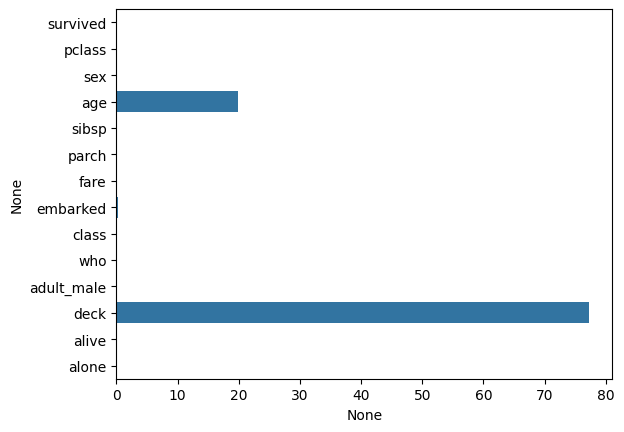

In [81]:
%matplotlib inline
ax = sns.barplot(
    x=df.isna().sum() / df.shape[0] * 100,
    y=df.columns,
)

In [82]:
!pip install missingno


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

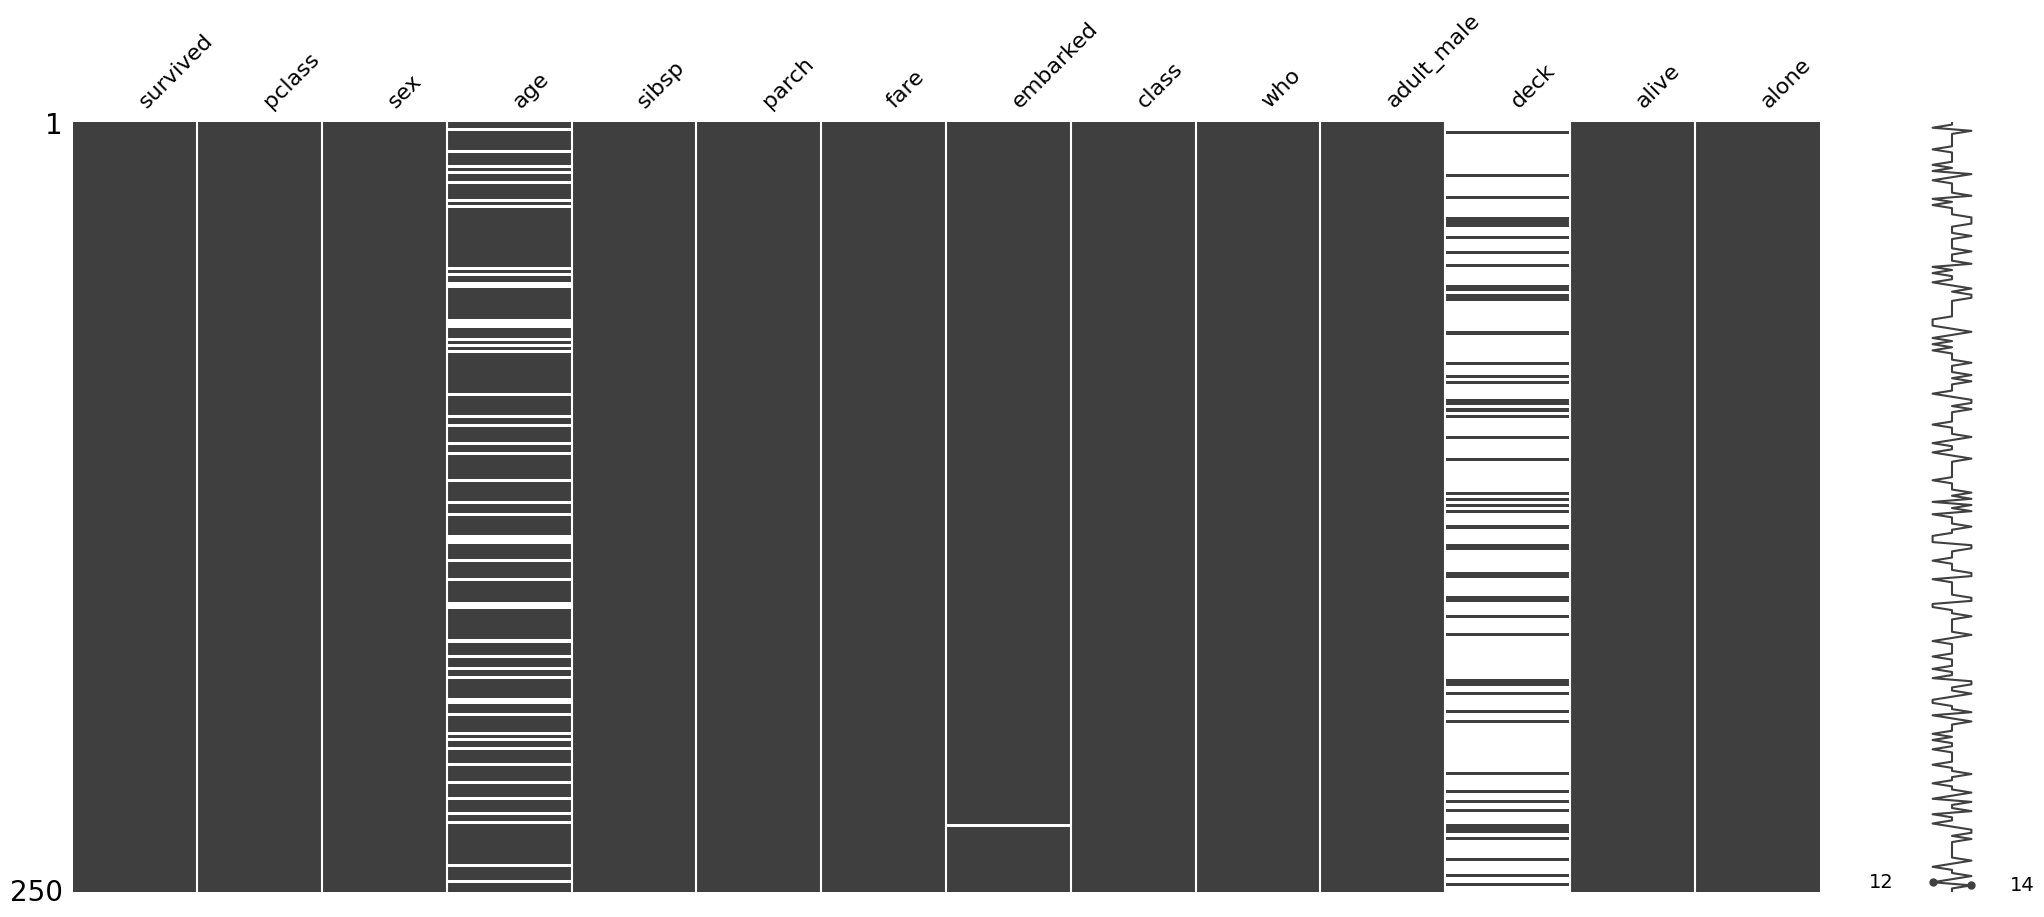

In [83]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250))

<Axes: >

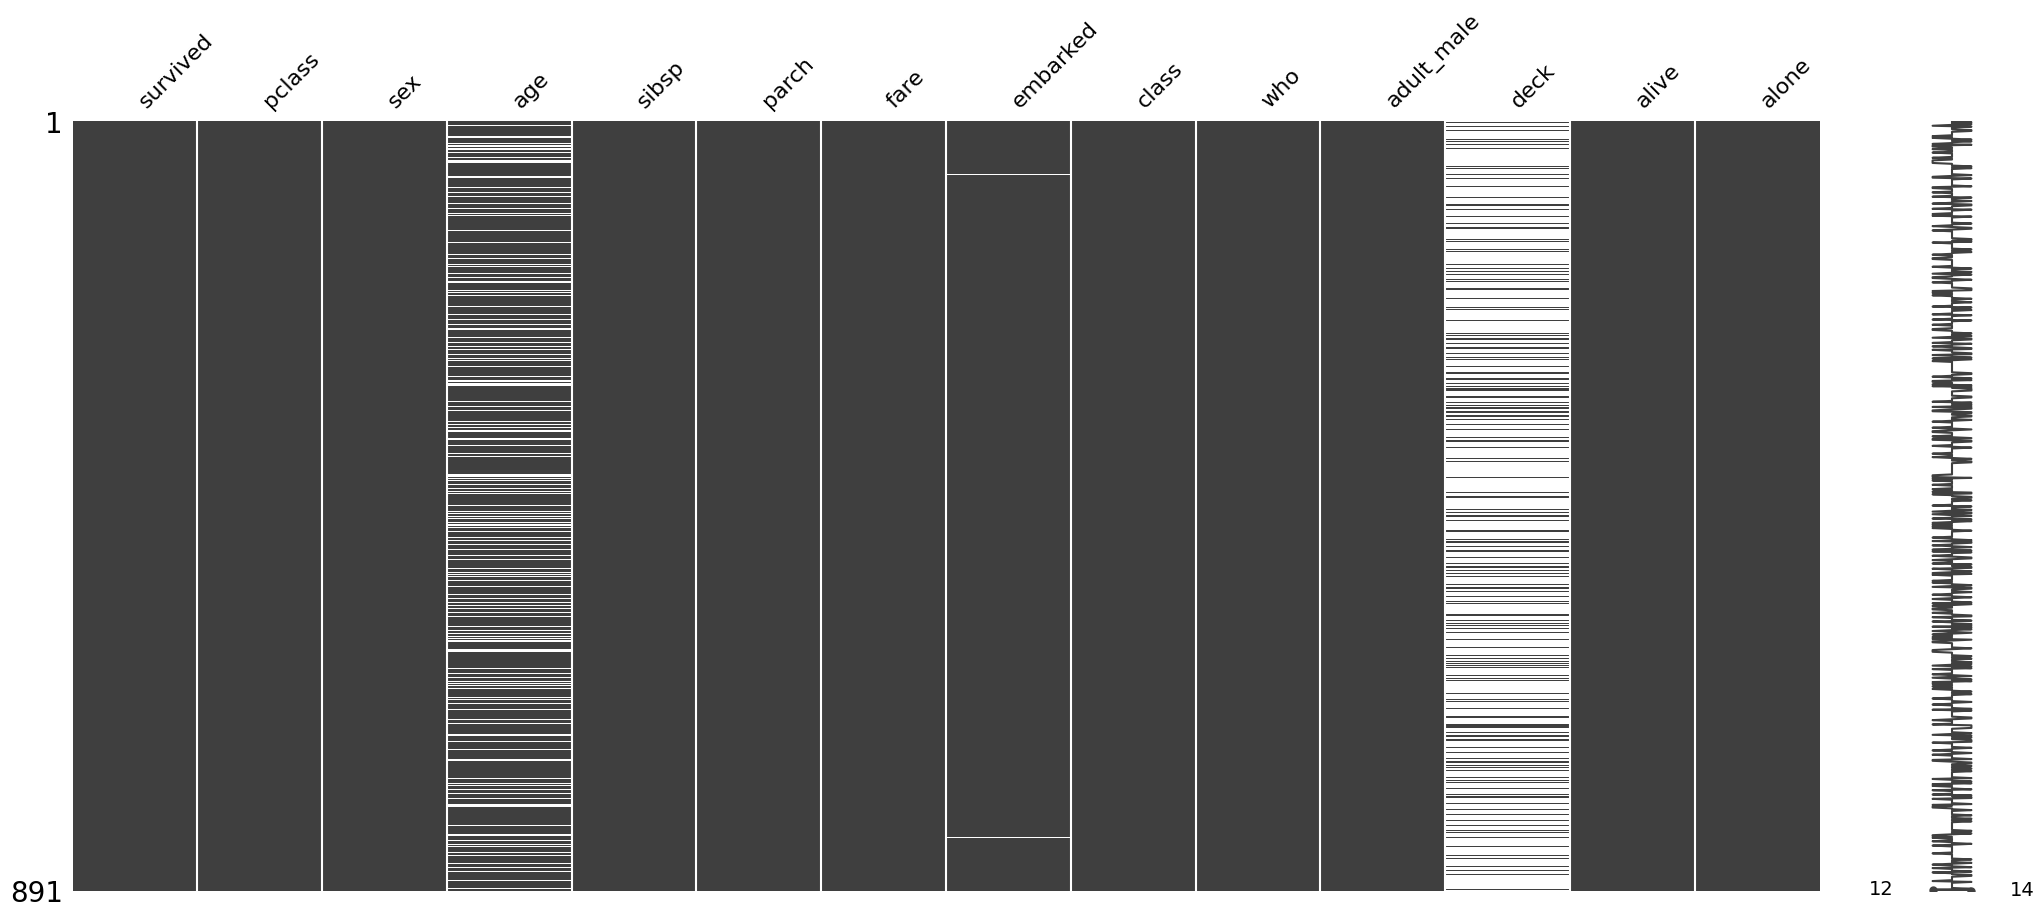

In [84]:
%matplotlib inline
msno.matrix(df)

In [85]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
134,0,2,1,25.0,0,0,13.0000,S,Second,man,True,NaN,0,True
285,0,3,1,33.0,0,0,8.6625,C,Third,man,True,NaN,0,True
605,0,3,1,36.0,1,0,15.5500,S,Third,man,True,NaN,0,False


In [86]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
692,1,3,1,NaN,0,0,56.4958,S,Third,man,True,NaN,1,True
215,1,1,0,31.0,1,0,113.2750,C,First,woman,False,D,1,False
594,0,2,1,37.0,1,0,26.0000,S,Second,man,True,NaN,0,False


In [87]:
df.drop(columns=['deck'], inplace=True)

In [88]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,0,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,1,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,0,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,1,True


In [89]:
df.age.fillna(30)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [90]:
df.age.fillna(df.age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [91]:
df.age.mean()

29.69911764705882

<Axes: xlabel='age', ylabel='Count'>

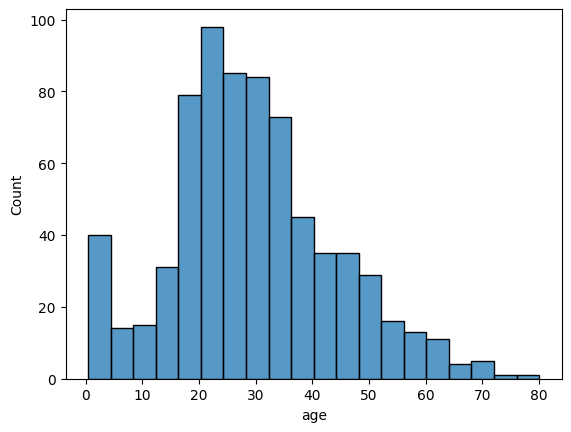

In [93]:
sns.histplot(df.age)

<Axes: xlabel='age', ylabel='Count'>

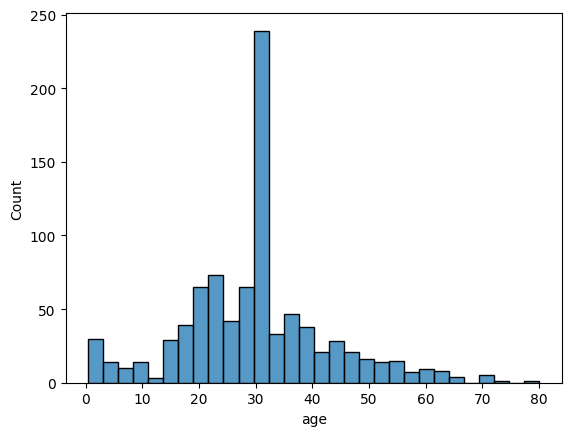

In [95]:
sns.histplot(df.age.fillna(df.age.mean()))

<Axes: xlabel='age', ylabel='Count'>

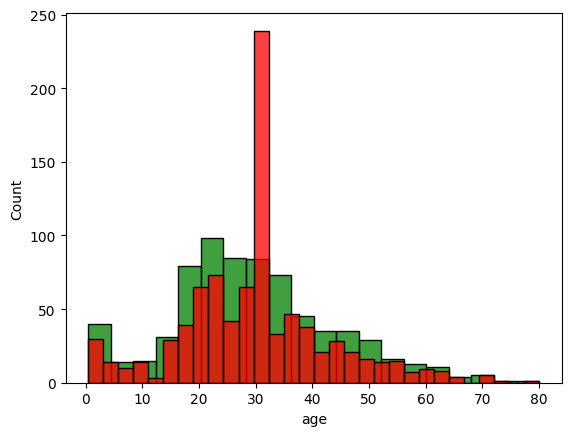

In [96]:
ax = sns.histplot(df.age, color='g')
sns.histplot(df.age.fillna(df.age.mean()), ax=ax, color='r')

In [101]:
df.corr(numeric_only=True)[['age']]

,age
survived,-0.077221
pclass,-0.369226
sex,0.093254
age,1.000000
sibsp,-0.308247
parch,-0.189119
fare,0.096067
adult_male,0.280328
alive,-0.077221
alone,0.198270


In [103]:
df.corr(numeric_only=True)[['age']].style.background_gradient('coolwarm')

,age
survived,-0.077221
pclass,-0.369226
sex,0.093254
age,1.000000
sibsp,-0.308247
parch,-0.189119
fare,0.096067
adult_male,0.280328
alive,-0.077221
alone,0.198270


In [104]:
# adult_male -> True -> mean of these

In [107]:
df.groupby(['adult_male']).age.mean()

adult_male
False    24.932458
True     33.173123
Name: age, dtype: float64

In [109]:
df.groupby(['sex']).age.mean()

sex
0    27.915709
1    30.726645
Name: age, dtype: float64

In [110]:
df.groupby(['adult_male']).age.transform('mean')

0      33.173123
1      24.932458
2      24.932458
3      24.932458
4      33.173123
         ...    
886    33.173123
887    24.932458
888    24.932458
889    33.173123
890    33.173123
Name: age, Length: 891, dtype: float64

In [111]:
df.groupby(['adult_male', 'age']).age.mean()

adult_male  age  
False       0.42      0.42
            0.67      0.67
            0.75      0.75
            0.83      0.83
            0.92      0.92
                     ...  
True        70.00    70.00
            70.50    70.50
            71.00    71.00
            74.00    74.00
            80.00    80.00
Name: age, Length: 133, dtype: float64

In [113]:
df.groupby(['adult_male', 'age']).age.transform('mean')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64